**Group Assignment**


1.   Yogesh Khandare 24
2.   Dewashish Solanke 40
3.   Pritesh Nistane 3334


***Implementation of Decision Tree from scratch***


**Task 1:-**  Implement ID3 algorithm using Entropy and Information gain for selected dataset and construct a Decision Tree without a library module and Evaluate model
accuracy(Train and Test)







In [ ]:
import pandas as pd
import numpy as np

In [3]:
def calc_total_entropy(train_data, label, class_list):
    total_row = train_data.shape[0]
    total_entr = 0
 
    for c in class_list:
        total_class_count = train_data[train_data[label] == c].shape[0]
        total_class_entr = - (total_class_count/total_row)*np.log2(total_class_count/total_row)
        total_entr += total_class_entr
 
    return total_entr

In [4]:
def calc_entropy(feature_value_data, label, class_list):
    class_count = feature_value_data.shape[0]
    entropy = 0

    for c in class_list:
        label_class_count = feature_value_data[feature_value_data[label] == c].shape[0]

        entropy_class = 0
        if label_class_count != 0:
            probability_class = label_class_count/class_count
            entropy_class = - probability_class * np.log2(probability_class)

        entropy += entropy_class

    return entropy


In [5]:
def calc_info_gain(feature_name, train_data, label, class_list):
    feature_value_list = train_data[feature_name].unique()
    total_row = train_data.shape[0]
    feature_info = 0.0

    for feature_value in feature_value_list:
        feature_value_data = train_data[train_data[feature_name] == feature_value]
        feature_value_count = feature_value_data.shape[0]
        feature_value_entropy = calc_entropy(feature_value_data, label, class_list)
        feature_value_probability = feature_value_count/total_row
        feature_info += feature_value_probability * feature_value_entropy

    return calc_total_entropy(train_data, label, class_list) - feature_info

In [6]:
def find_most_informative_feature(train_data, label, class_list):
    feature_list = train_data.columns.drop(label)
    max_info_gain = -1
    max_info_feature = None

    for feature in feature_list:
        feature_info_gain = calc_info_gain(feature, train_data, label, class_list)
        if max_info_gain < feature_info_gain:
            max_info_gain = feature_info_gain
            max_info_feature = feature

    return max_info_feature


In [7]:
def generate_sub_tree(feature_name, train_data, label, class_list):
    tree = {}
    if feature_name == None:
        return tree, train_data
    else:
        feature_value_count_dict = train_data[feature_name].value_counts(sort=False)
    for feature_value, count in feature_value_count_dict.iteritems():
        feature_value_data = train_data[train_data[feature_name] == feature_value]

        assigned_to_node = False
        for c in class_list:
            class_count = feature_value_data[feature_value_data[label] == c].shape[0]
            if class_count == count:
                tree[feature_value] = c
                train_data = train_data[train_data[feature_name] != feature_value]
                assigned_to_node = True
        if not assigned_to_node:
            tree[feature_value] = "?"

    return tree, train_data

In [8]:
def make_tree(root, prev_feature_value, train_data, label, class_list):
    if train_data.shape[0] != 0:
        max_info_feature = find_most_informative_feature(train_data, label, class_list)
        tree, train_data = generate_sub_tree(max_info_feature, train_data, label, class_list)
        next_root = None

        if prev_feature_value != None:
            root[prev_feature_value] = dict()
            root[prev_feature_value][max_info_feature] = tree
            next_root = root[prev_feature_value][max_info_feature]
        else:
            root[max_info_feature] = tree
            next_root = root[max_info_feature]

        for node, branch in list(next_root.items()):
            if branch == "?":
                feature_value_data = train_data[train_data[max_info_feature] == node]
                make_tree(next_root, node, feature_value_data, label, class_list)


In [9]:
def id3(train_data_m, label):

    train_data = train_data_m.copy()
    tree = {}
    class_list = train_data[label].unique()
    make_tree(tree,None, train_data, label, class_list)

    return tree

In [10]:
def predict(tree, instance):
    if not isinstance(tree, dict):
        return tree
    else:
        root_node = next(iter(tree))
        feature_value = instance[root_node]
        if feature_value in tree[root_node]:
            return predict(tree[root_node][feature_value], instance)
        else:
            return None

In [11]:
def evaluate(tree, test_data_m, label):
    correct_preditct = 0
    wrong_preditct = 0
    for index in range (0,114):
        result = predict(tree, test_data_m.iloc[index])
        if result == test_data_m[label].iloc[index]:
            correct_preditct += 1
        else:
            wrong_preditct += 1
    accuracy = correct_preditct / (correct_preditct + wrong_preditct)
    return accuracy

In [12]:
from google.colab import files
uploaded = files.upload()


Saving data.csv to data.csv


In [13]:
data = pd.read_csv("data.csv")

In [14]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [15]:
columns_to_drop = ['id', 'Unnamed: 32']

In [16]:
data = data.drop(columns_to_drop, axis=1)

In [17]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [18]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(data, test_size=0.2, random_state=0)

# Print the size of the training and testing datasets
print("Training set size:", train_df.shape)
print("Testing set size:", test_df.shape)

Training set size: (455, 31)
Testing set size: (114, 31)


In [19]:
train_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
338,B,10.050,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.01775,0.1890,...,11.160,26.84,71.98,384.0,0.14020,0.14020,0.1055,0.06499,0.2894,0.07664
427,B,10.800,21.98,68.79,359.9,0.08801,0.05743,0.03614,0.01404,0.2016,...,12.760,32.04,83.69,489.5,0.13030,0.16960,0.1927,0.07485,0.2965,0.07662
406,B,16.140,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,...,17.710,19.58,115.90,947.9,0.12060,0.17220,0.2310,0.11290,0.2778,0.07012
96,B,12.180,17.84,77.79,451.1,0.10450,0.07057,0.02490,0.02941,0.1900,...,12.830,20.92,82.14,495.2,0.11400,0.09358,0.0498,0.05882,0.2227,0.07376
490,B,12.250,22.44,78.18,466.5,0.08192,0.05200,0.01714,0.01261,0.1544,...,14.170,31.99,92.74,622.9,0.12560,0.18040,0.1230,0.06335,0.3100,0.08203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,M,18.810,19.98,120.90,1102.0,0.08923,0.05884,0.08020,0.05843,0.1550,...,19.960,24.30,129.00,1236.0,0.12430,0.11600,0.2210,0.12940,0.2567,0.05737
9,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.1050,0.22100,0.4366,0.20750
359,B,9.436,18.32,59.82,278.6,0.10090,0.05956,0.02710,0.01406,0.1506,...,12.020,25.02,75.79,439.6,0.13330,0.10490,0.1144,0.05052,0.2454,0.08136
192,B,9.720,18.22,60.73,288.1,0.06950,0.02344,0.00000,0.00000,0.1653,...,9.968,20.83,62.25,303.8,0.07117,0.02729,0.0000,0.00000,0.1909,0.06559


In [20]:
test_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
512,M,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,...,16.41,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090
457,B,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,...,14.35,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788
439,B,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,...,14.91,19.31,96.53,688.9,0.10340,0.10170,0.06260,0.08216,0.2136,0.06710
298,B,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,...,16.22,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676
37,B,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,M,17.42,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.06597,0.1308,...,18.07,28.07,120.40,1021.0,0.12430,0.17930,0.28030,0.10990,0.1603,0.06818
519,B,12.75,16.70,82.51,493.8,0.11250,0.11170,0.03880,0.02995,0.2120,...,14.45,21.74,93.63,624.1,0.14750,0.19790,0.14230,0.08045,0.3071,0.08557
432,M,20.18,19.54,133.80,1250.0,0.11330,0.14890,0.21330,0.12590,0.1724,...,22.03,25.07,146.00,1479.0,0.16650,0.29420,0.53080,0.21730,0.3032,0.08075
516,M,18.31,20.58,120.80,1052.0,0.10680,0.12480,0.15690,0.09451,0.1860,...,21.86,26.20,142.20,1493.0,0.14920,0.25360,0.37590,0.15100,0.3074,0.07863


In [21]:
tree = id3(train_df,'diagnosis')
tree

{'concave points_mean': {0.01775: 'B',
  0.01404: 'B',
  0.04528: 'B',
  0.02941: 'B',
  0.01261: 'B',
  0.02864: 'B',
  0.02763: 'B',
  0.02107: 'B',
  0.06618: 'M',
  0.0555: 'B',
  0.1265: 'M',
  0.05564: 'B',
  0.04603: 'B',
  0.02755: 'B',
  0.02438: 'B',
  0.0: 'B',
  0.07762: 'M',
  0.002404: 'B',
  0.003261: 'B',
  0.05102: 'B',
  0.02854: 'B',
  0.008907: 'B',
  0.03027: 'B',
  0.04335: 'M',
  0.1237: 'M',
  0.03068: 'B',
  0.02647: 'B',
  0.06556: 'B',
  0.1286: 'M',
  0.0228: 'B',
  0.007583: 'B',
  0.09791: 'M',
  0.01238: 'B',
  0.02307: 'M',
  0.008488: 'B',
  0.02088: 'B',
  0.04391: 'B',
  0.07798: 'B',
  0.04375: 'B',
  0.03152: 'B',
  0.01952: 'B',
  0.09029: 'M',
  0.02944: 'B',
  0.03085: 'M',
  0.01835: 'B',
  0.09113: 'M',
  0.1103: 'M',
  0.008535: 'B',
  0.03613: 'B',
  0.05736: 'M',
  0.02875: 'B',
  0.109: 'M',
  0.05985: 'M',
  0.08824: 'M',
  0.03783: 'B',
  0.02424: 'B',
  0.01282: 'B',
  0.01969: 'B',
  0.0178: 'B',
  0.02331: 'B',
  0.05814: 'M',
  0.0079

In [22]:
accuracy = evaluate(tree, test_df, 'diagnosis')
print("accuracy:", accuracy*100)


accuracy: 7.017543859649122


**Implementation of Tree using library**

**Task 2:-**  Construct, demonstrate and submit the decision tree using the Sklearn library using Entropy and Gini index approach. Compare the result of both decision trees
(Accuracy, precision and recall, and F1 score along with graphical visualization). Check the decision tree performance when presort =true and max depth=3 for both methods.
Display the all decision tree classifier attributes values for both methods. Measure training error and test error training data and test data respectively. Include a picture of the
learned decision trees, at depths 4, 3, and 2, respectively. Comment on best model performance.


In [23]:
x_train = train_df.iloc[:, 1:31]
x_train


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
338,10.050,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.01775,0.1890,0.06331,...,11.160,26.84,71.98,384.0,0.14020,0.14020,0.1055,0.06499,0.2894,0.07664
427,10.800,21.98,68.79,359.9,0.08801,0.05743,0.03614,0.01404,0.2016,0.05977,...,12.760,32.04,83.69,489.5,0.13030,0.16960,0.1927,0.07485,0.2965,0.07662
406,16.140,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,0.05875,...,17.710,19.58,115.90,947.9,0.12060,0.17220,0.2310,0.11290,0.2778,0.07012
96,12.180,17.84,77.79,451.1,0.10450,0.07057,0.02490,0.02941,0.1900,0.06635,...,12.830,20.92,82.14,495.2,0.11400,0.09358,0.0498,0.05882,0.2227,0.07376
490,12.250,22.44,78.18,466.5,0.08192,0.05200,0.01714,0.01261,0.1544,0.05976,...,14.170,31.99,92.74,622.9,0.12560,0.18040,0.1230,0.06335,0.3100,0.08203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,18.810,19.98,120.90,1102.0,0.08923,0.05884,0.08020,0.05843,0.1550,0.04996,...,19.960,24.30,129.00,1236.0,0.12430,0.11600,0.2210,0.12940,0.2567,0.05737
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.1050,0.22100,0.4366,0.20750
359,9.436,18.32,59.82,278.6,0.10090,0.05956,0.02710,0.01406,0.1506,0.06959,...,12.020,25.02,75.79,439.6,0.13330,0.10490,0.1144,0.05052,0.2454,0.08136
192,9.720,18.22,60.73,288.1,0.06950,0.02344,0.00000,0.00000,0.1653,0.06447,...,9.968,20.83,62.25,303.8,0.07117,0.02729,0.0000,0.00000,0.1909,0.06559


In [24]:
y_train = train_df['diagnosis']
y_train

338    B
427    B
406    B
96     B
490    B
      ..
277    M
9      M
359    B
192    B
559    B
Name: diagnosis, Length: 455, dtype: object

In [25]:
x_test = test_df.iloc[:, 1:31]
x_test


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
512,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,...,16.41,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090
457,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,14.35,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788
439,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,0.05586,...,14.91,19.31,96.53,688.9,0.10340,0.10170,0.06260,0.08216,0.2136,0.06710
298,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,0.05586,...,16.22,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676
37,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,17.42,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.06597,0.1308,0.05866,...,18.07,28.07,120.40,1021.0,0.12430,0.17930,0.28030,0.10990,0.1603,0.06818
519,12.75,16.70,82.51,493.8,0.11250,0.11170,0.03880,0.02995,0.2120,0.06623,...,14.45,21.74,93.63,624.1,0.14750,0.19790,0.14230,0.08045,0.3071,0.08557
432,20.18,19.54,133.80,1250.0,0.11330,0.14890,0.21330,0.12590,0.1724,0.06053,...,22.03,25.07,146.00,1479.0,0.16650,0.29420,0.53080,0.21730,0.3032,0.08075
516,18.31,20.58,120.80,1052.0,0.10680,0.12480,0.15690,0.09451,0.1860,0.05941,...,21.86,26.20,142.20,1493.0,0.14920,0.25360,0.37590,0.15100,0.3074,0.07863


In [26]:
y_test = test_df['diagnosis']
y_test

512    M
457    B
439    B
298    B
37     B
      ..
213    M
519    B
432    M
516    M
500    B
Name: diagnosis, Length: 114, dtype: object

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [28]:
model = DecisionTreeClassifier()
model = model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred)*100)


Accuracy:  91.22807017543859


In [29]:
model1 = DecisionTreeClassifier(criterion="entropy", splitter="random", max_depth=3, min_samples_leaf=3, random_state=1, max_leaf_nodes=3, class_weight="balanced")
model1 = model1.fit(x_train,y_train)
y_pred1 = model1.predict(x_test)
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred1)*100)


Accuracy:  86.8421052631579


In [30]:
model2 = DecisionTreeClassifier(criterion="gini", random_state=40, max_depth=3, max_features='sqrt')
model2 = model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred2)*100)

Accuracy:  91.22807017543859


***precision, recall, Accuracy and F1 score along with visualization***

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
conf_matrix = confusion_matrix(y_test, y_pred)
precis_score = precision_score(y_test, y_pred , average='macro' )
recall=recall_score(y_test, y_pred, average='macro')
f1 =f1_score(y_test, y_pred, average='macro')
accur_score = accuracy_score(y_test, y_pred ,normalize=False )
precis_score, recall, f1, accur_score


(0.907563025210084, 0.9158463004128294, 0.9105180533751962, 104)

In [32]:
conf_matrix

array([[60,  7],
       [ 3, 44]])

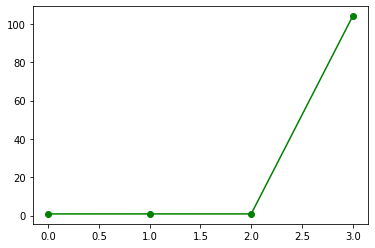

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.plot([precis_score, recall, f1, accur_score], 'go-')
plt.show()

In [34]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [35]:
features = x_train.columns
features


Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

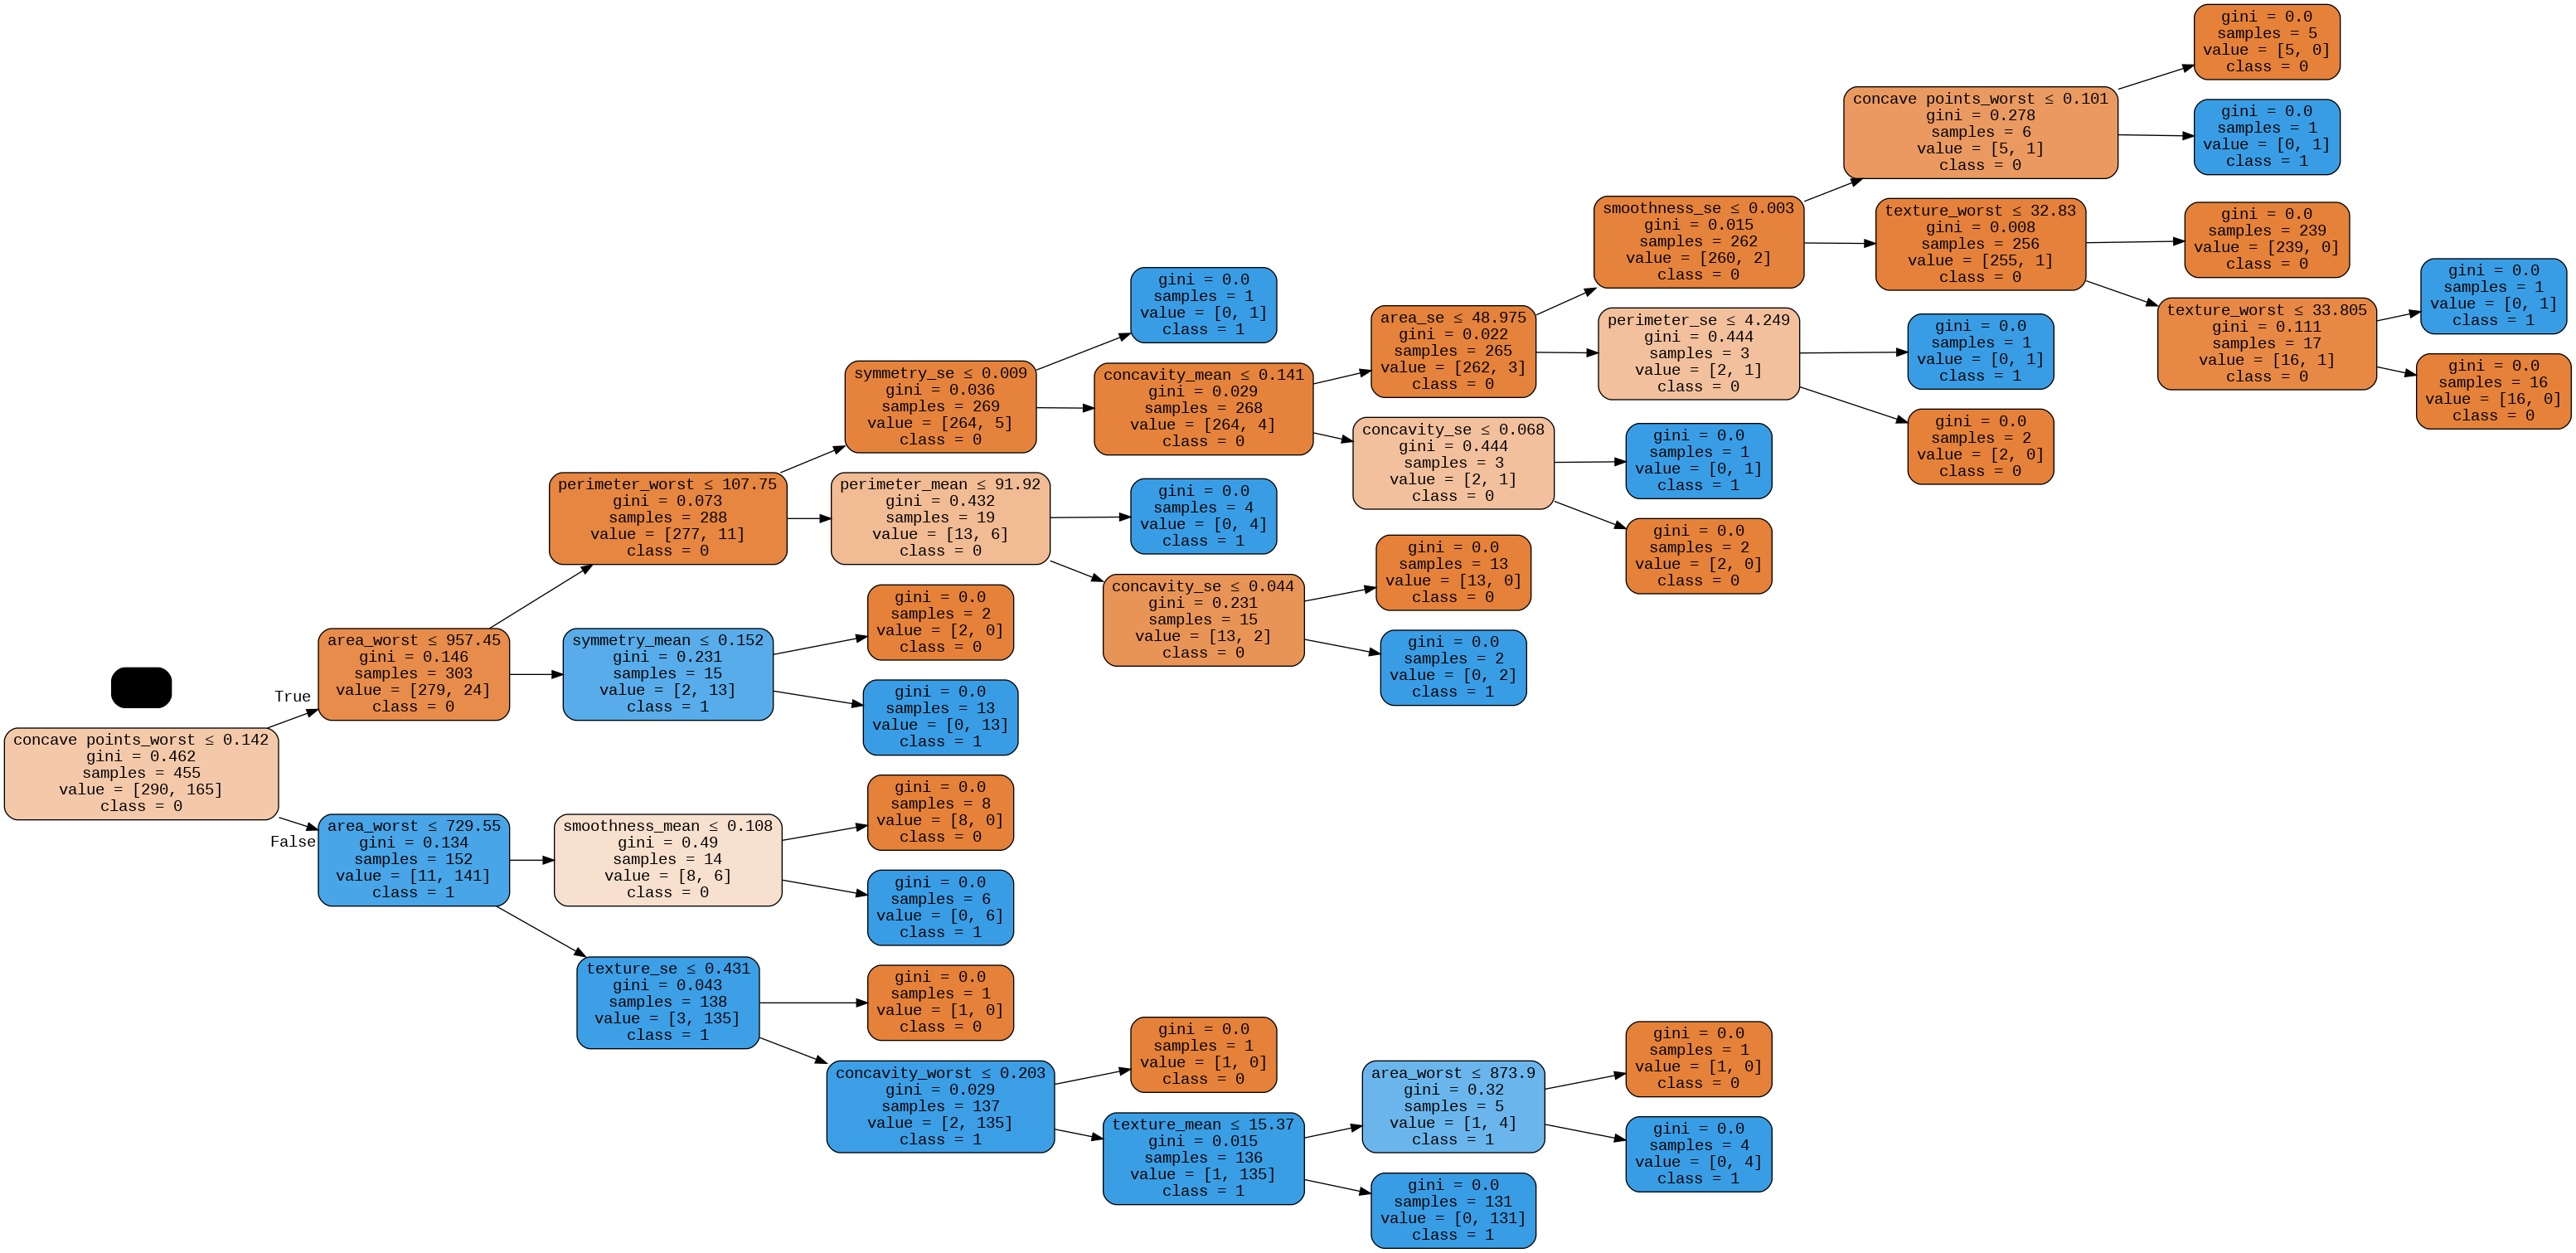

In [36]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=features, class_names=['0','1','2','3','4','5','6','7','8','9','0'], rotate=True, fontname="Comic Sans MS")
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('cancer.png')
Image(graph.create_png())

**RandomForestClassifier()**

**Task 3:** Implement Randomforest decision Tree and compare its performance decision tree models in task 2


In [37]:
from sklearn.ensemble import RandomForestClassifier
modelr = RandomForestClassifier()
modelr = modelr.fit(x_train,y_train)
ypredr = modelr.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test, ypredr)*100)


Accuracy:  97.36842105263158


*Comparison Between Desicion Tree Classifier, Random Forest Classifier*

In [40]:
 Names=["Model" , "Modelr"]
classifiers =[DecisionTreeClassifier(), RandomForestClassifier() ]
index=0
for name , clf in zip(Names , classifiers):
    clf.fit(x_train, y_train)
    test_df.loc[index, 'Classifiers'] = name
    test_df.loc[index, 'Train Accuracy'] = clf.score(x_train , y_train)
    test_df.loc[index, 'Test Accuracy'] = clf.score(x_test , y_test)
    index+=1


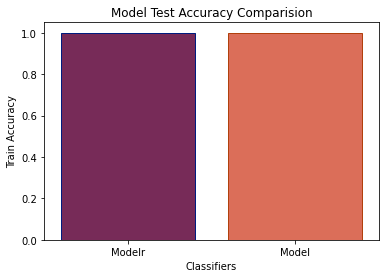

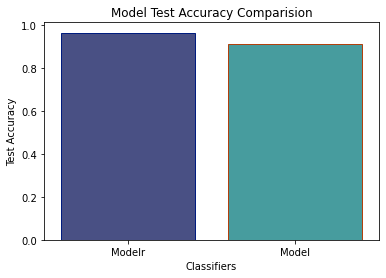

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='Classifiers' , y ='Train Accuracy' , data = test_df , palette='rocket',edgecolor=sns.color_palette('dark',4))
plt.title("Model Test Accuracy Comparision")
plt.show()
sns.barplot(x='Classifiers' , y ='Test Accuracy' , data = test_df , palette='mako',edgecolor=sns.color_palette('dark',6))
plt.title("Model Test Accuracy Comparision")
plt.show()